# Multiple Linear Regression

## Dataset info
print(california.DESCR) used this code for this info

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:

        - MedInc        median income in block group

        - HouseAge      median house age in block group

        - AveRooms      average number of rooms per household

        - AveBedrms     average number of bedrooms per household

        - Population    block group population

        - AveOccup      average number of household members

        - Latitude      block group latitude
        
        - Longitude     block group longitude

    :Missing Attribute Values: None

 **:The target variable is the median house value for California districts,expressed in hundreds of thousands of dollars ($100,000).**



### Additional Info
This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bureau publishes sample data (a block group typically has a population
of 600 to 3,000 people).

A household is a group of people residing within a home. Since the average
number of rooms and bedrooms in this dataset are provided per household, these
columns may take surprisingly large values for block groups with few households
and many empty houses, such as vacation resorts.

In [705]:
from sklearn.datasets import fetch_california_housing # To fetch dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # for scaling
from sklearn.linear_model import LinearRegression # for trainig model
from sklearn.metrics import mean_absolute_error,mean_squared_error # To check errors
from sklearn.metrics import r2_score # To check Accuracy of model
import pickle # for pickling

### Playing with keys and other fucntions of sklearn dataset

In [648]:
california = fetch_california_housing()

california

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [649]:
california.DESCR
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [650]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [651]:
california.target_names

['MedHouseVal']

In [652]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [653]:
california.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [654]:
california.target_names

['MedHouseVal']

In [655]:
california.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

### Converting sklearn dataset to pandas dataframe

In [656]:
df =pd.DataFrame(california.data,columns=california.feature_names)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [657]:
df['MedHouseVal'] = california.target
df['MedHouseVal']

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

## EDA

### Insights
- Data don't have any null values
- AveBedrms ( average number of bedrooms per household ) is in float values but this should be integer 
- AveRooms ( average number of bedrooms per household )  is in float values but this should be integer 
-  Population( block group population) is in float values but this should be integer 
- AveOccup  (average number of household members) is in float values but this should be integer 
- MedHouseVal (median house value for California) I would convert it into Rupees
#### Outliers:
- AveOccup,Population,AveBedrms,AveRooms these features have outliers


In [658]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


### converting Columns Dtype

In [659]:
df['Population'] = df['Population'].astype('int64')
df['AveOccup'] = df['AveOccup'].astype('int64')
df['AveRooms'] = df['AveRooms'].astype('int64')
df['AveBedrms'] = df['AveBedrms'].astype('int64')


In [660]:
min(df['Population']),max(df['Population'])

(3, 35682)

In [661]:
min(df['AveOccup']),max(df['AveOccup'])


(0, 1243)

In [662]:
max(df['AveBedrms']),min(df['AveBedrms'])


(34, 0)

In [663]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  int64  
 3   AveBedrms    20640 non-null  int64  
 4   Population   20640 non-null  int64  
 5   AveOccup     20640 non-null  int64  
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(5), int64(4)
memory usage: 1.4 MB


In [664]:
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [665]:
# round(df.describe(),ndigits=3)
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.00000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,4.933818,0.81594,1425.476744,2.565213,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.489414,0.60992,1132.462122,10.391457,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.000000,0.00000,3.000000,0.000000,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.000000,1.00000,787.000000,2.000000,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.000000,1.00000,1166.000000,2.000000,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.000000,1.00000,1725.000000,3.000000,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.000000,34.00000,35682.000000,1243.000000,41.950000,-114.310000,5.000010


In [666]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.325218,-0.108681,0.004834,0.018281,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.152851,-0.080917,-0.296244,0.013398,0.011173,-0.108197,0.105623
AveRooms,0.325218,-0.152851,1.000000,0.632336,-0.072054,-0.002948,0.106220,-0.028202,0.151219
AveBedrms,-0.108681,-0.080917,0.632336,1.000000,0.046231,-0.012138,0.052146,0.010093,-0.038671
Population,0.004834,-0.296244,-0.072054,0.046231,1.000000,0.070055,-0.108785,0.099773,-0.024650
AveOccup,0.018281,0.013398,-0.002948,-0.012138,0.070055,1.000000,0.002133,0.002699,-0.024399
Latitude,-0.079809,0.011173,0.106220,0.052146,-0.108785,0.002133,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.028202,0.010093,0.099773,0.002699,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151219,-0.038671,-0.024650,-0.024399,-0.144160,-0.045967,1.000000


### EDA Using visualization 

#### cheking Ourliers in our dataset

C:\Users\Estel\AppData\Local\Temp\ipykernel_2884\114824839.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


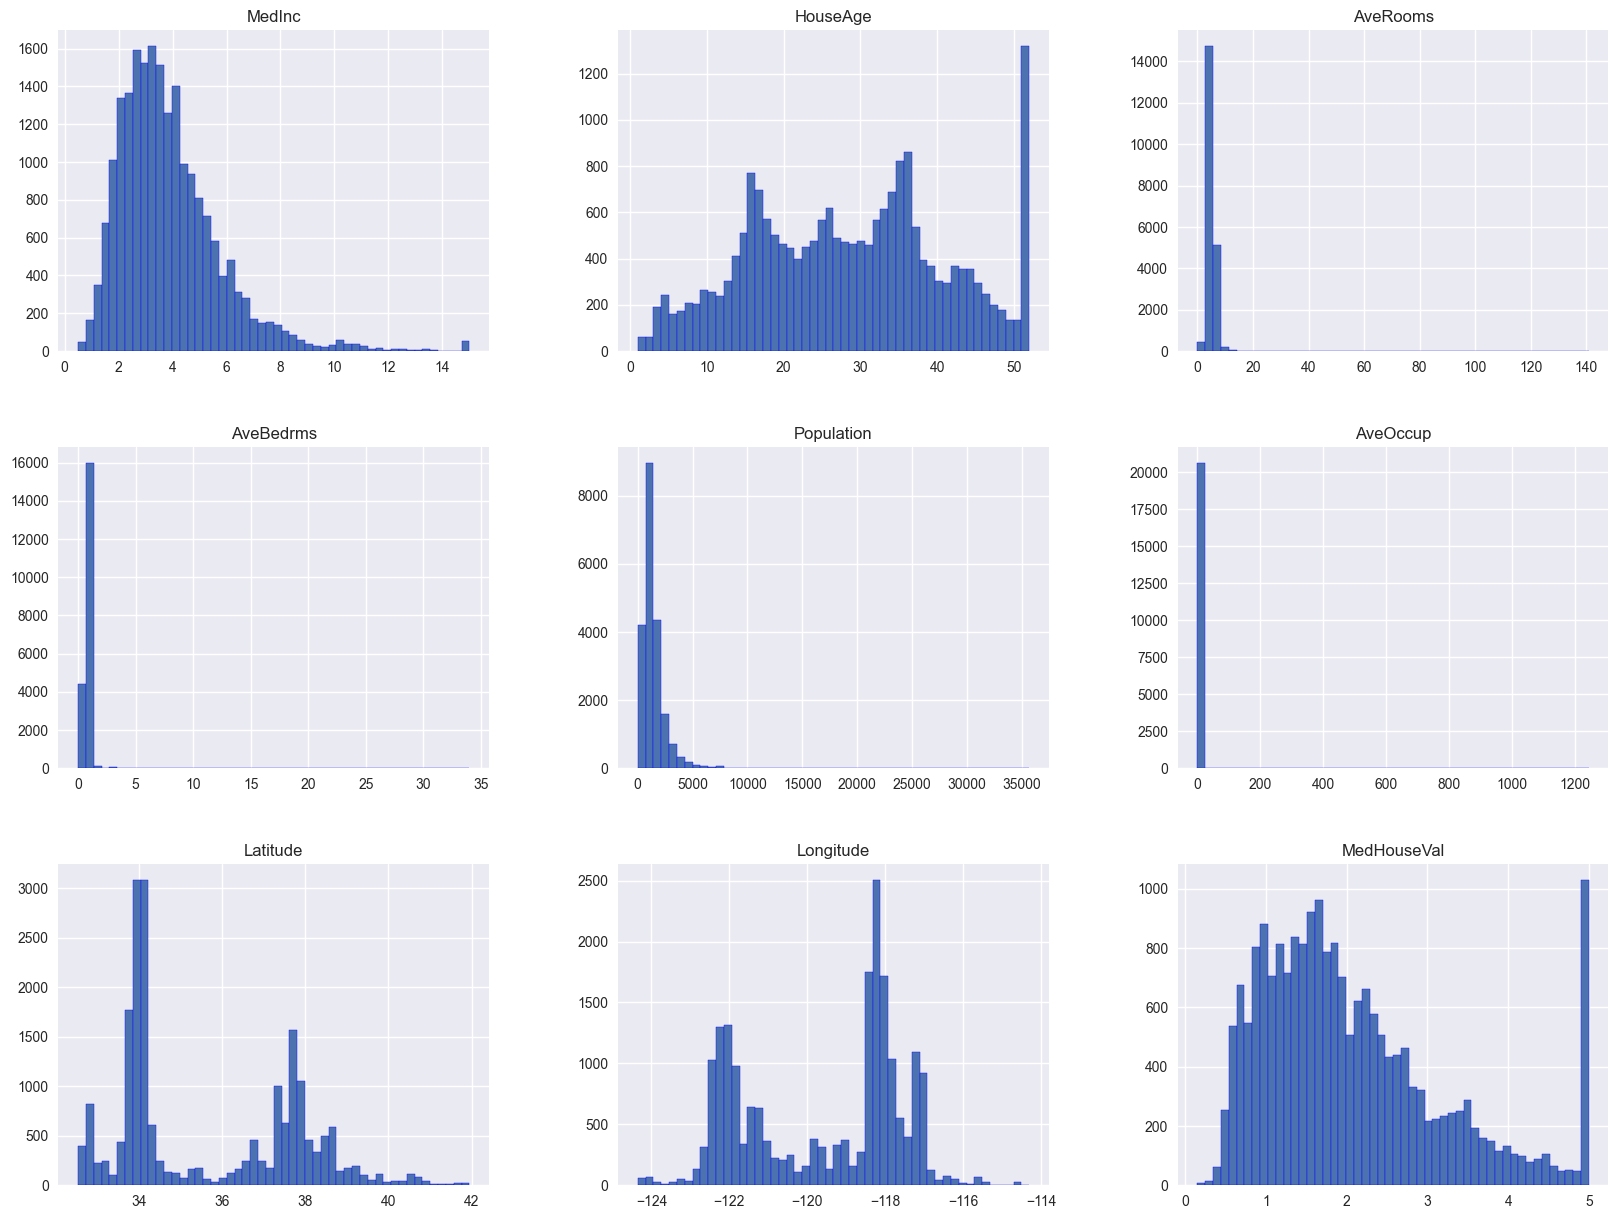

In [667]:
plt.style.use('seaborn')
df.hist(bins=50, figsize=(20,15), ec = 'b')
plt.show()

In [668]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [669]:
def boxplot(feature):
    plt.figure(figsize=(14,5.5))
    sns.boxplot(data= df,y=df[feature])
    plt.xlabel(feature)
    plt.show()

In [670]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

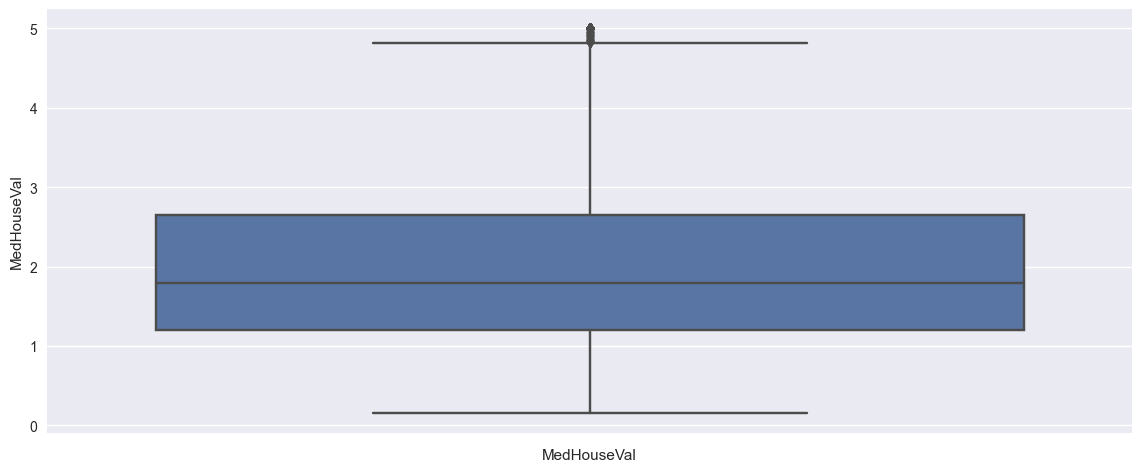

In [671]:
boxplot('MedHouseVal')

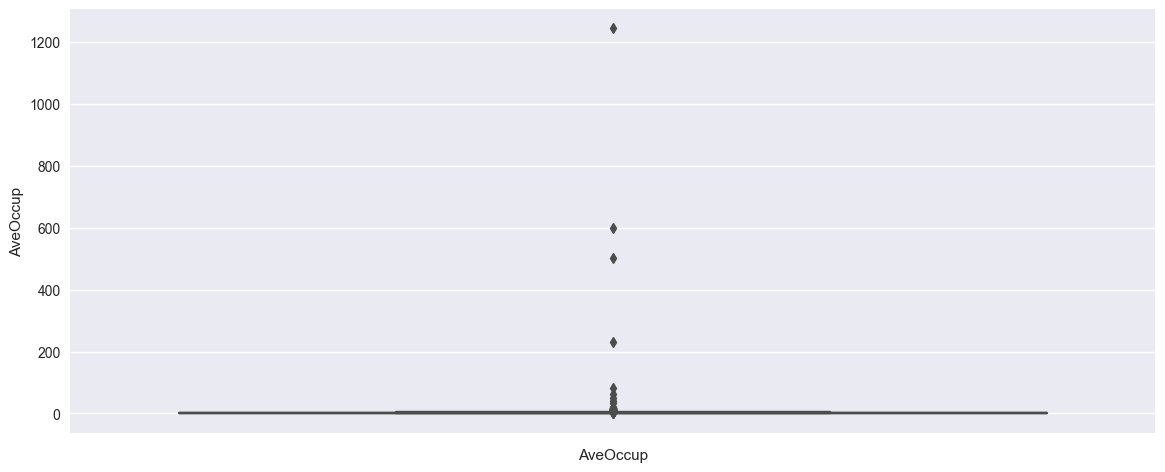

In [672]:
boxplot('AveOccup')

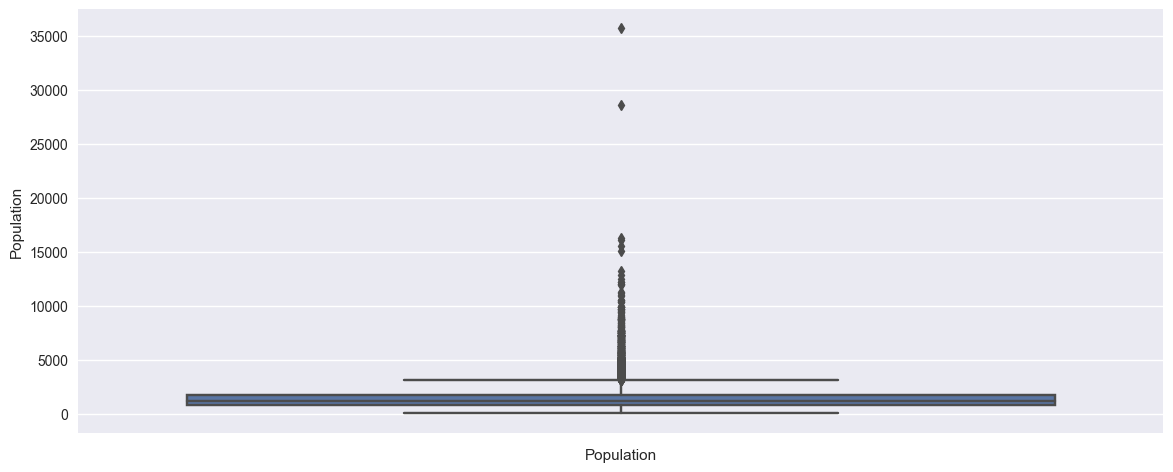

In [673]:
boxplot('Population')

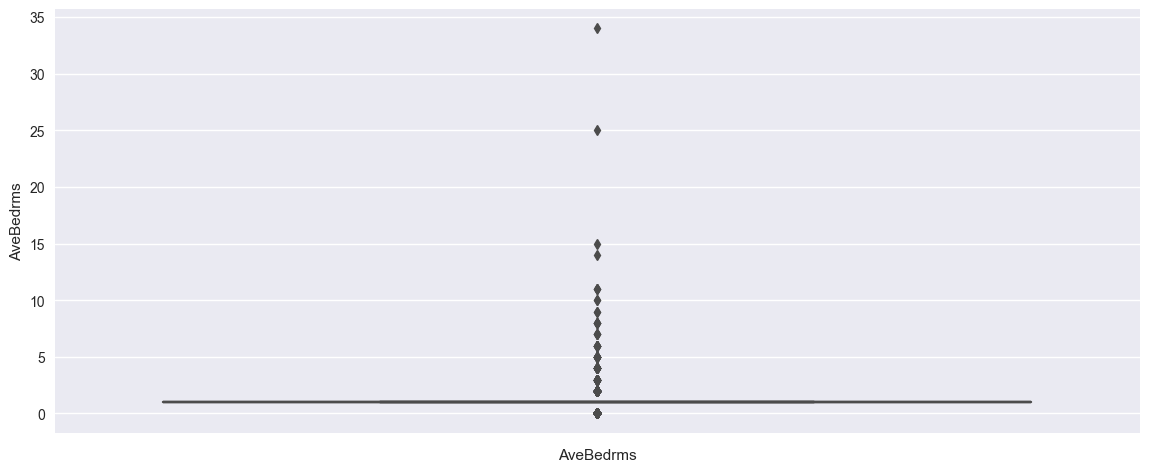

In [674]:
boxplot('AveBedrms')

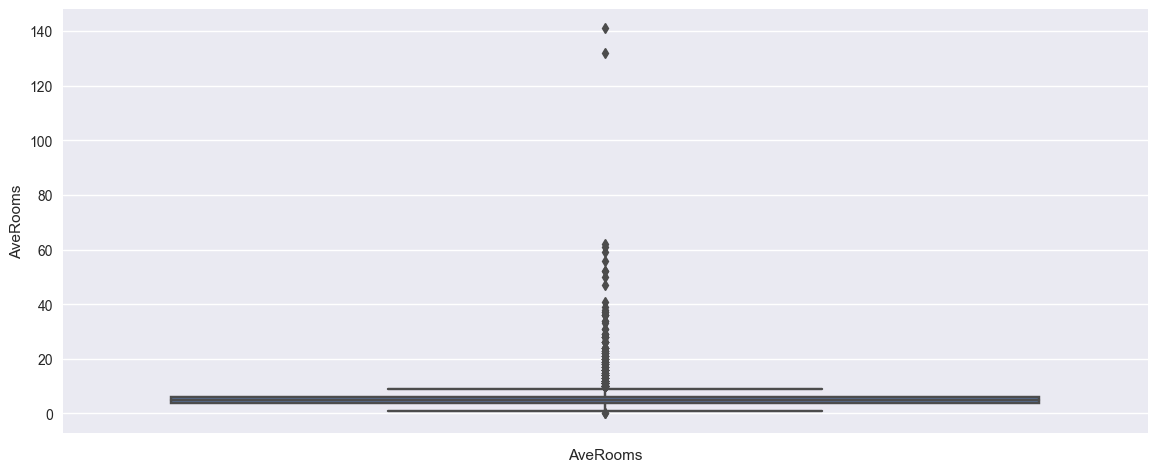

In [675]:
boxplot('AveRooms')

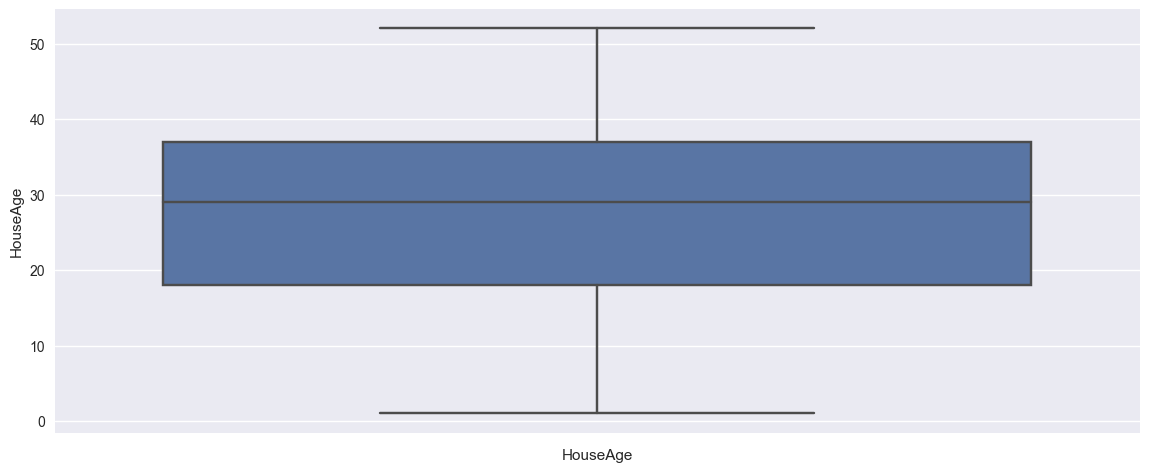

In [676]:
boxplot(feature='HouseAge')

### Correlation

In [677]:
df.corr() # this is by default pearson correlation

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.325218,-0.108681,0.004834,0.018281,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.152851,-0.080917,-0.296244,0.013398,0.011173,-0.108197,0.105623
AveRooms,0.325218,-0.152851,1.000000,0.632336,-0.072054,-0.002948,0.106220,-0.028202,0.151219
AveBedrms,-0.108681,-0.080917,0.632336,1.000000,0.046231,-0.012138,0.052146,0.010093,-0.038671
Population,0.004834,-0.296244,-0.072054,0.046231,1.000000,0.070055,-0.108785,0.099773,-0.024650
AveOccup,0.018281,0.013398,-0.002948,-0.012138,0.070055,1.000000,0.002133,0.002699,-0.024399
Latitude,-0.079809,0.011173,0.106220,0.052146,-0.108785,0.002133,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.028202,0.010093,0.099773,0.002699,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151219,-0.038671,-0.024650,-0.024399,-0.144160,-0.045967,1.000000


In [678]:
df.corr(method='spearman') >= 0.6

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,True,False,True,False,False,False,False,False,True
HouseAge,False,True,False,False,False,False,False,False,False
AveRooms,True,False,True,False,False,False,False,False,False
AveBedrms,False,False,False,True,False,False,False,False,False
Population,False,False,False,False,True,False,False,False,False
AveOccup,False,False,False,False,False,True,False,False,False
Latitude,False,False,False,False,False,False,True,False,False
Longitude,False,False,False,False,False,False,False,True,False
MedHouseVal,True,False,False,False,False,False,False,False,True


<Axes: >

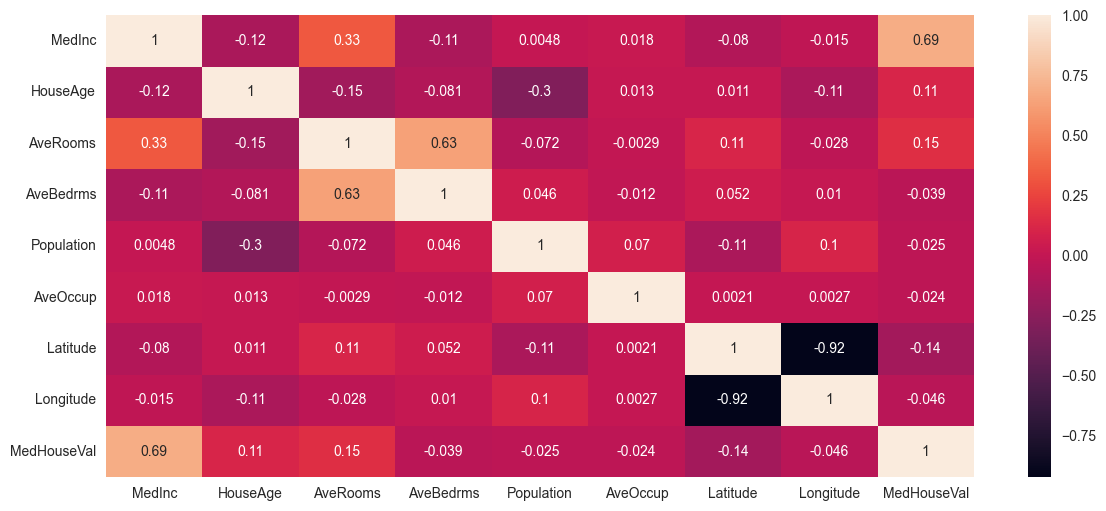

In [679]:
plt.figure(figsize=(14,6))
sns.heatmap(data=df.corr(),annot=True )

<Axes: >

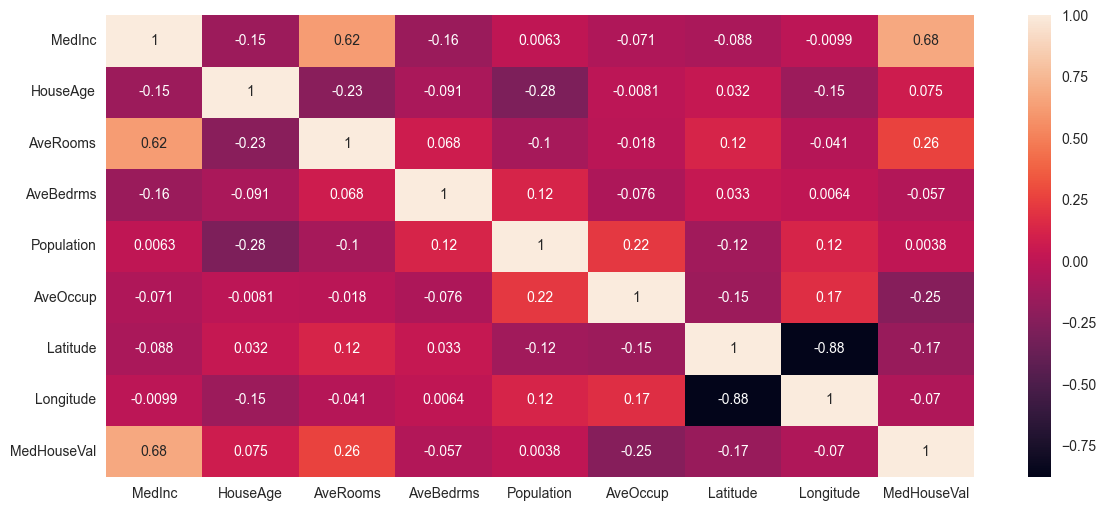

In [680]:
plt.figure(figsize=(14,6))
sns.heatmap(data=df.corr(method='spearman'),annot=True )

## Removing Outliers from our dataset
- AveOccup,Population,AveBedrms,AveRooms these features have outliers

In [681]:
# def outliers(feature) :
#     minimum,Q1,Q2,Q3,maximum = np.quantile(df[feature],q=[.0,.25,.5,.75,1])
#     IQR = Q3-Q1
#     lower_fence = Q1-1.5*IQR
#     higher_fence = Q3+1.5*IQR
#     outliers_lst = []
#     for i in df[feature]:
#         if i>=lower_fence and i<=higher_fence:
#             pass
#         else:
#             outliers_lst.append(i)
#     print(outliers_lst)
#     df_Outliers = df[(df[feature]) > min(outliers_lst)].index
#     df.drop(df_Outliers,inplace=True)

# outliers('AveOccup')
# outliers('AveBedrms')
# outliers('Population')
# outliers('AveRooms')


## Because of my this act I had remained Only 3 rows left😂😂😂 | I am not gonna to remove Outliers

# Applying Algorithm

In [682]:
# Dividing our dataset into dependent and independent features
X =df.iloc[:,:-1] # independent features
y = df.iloc[:,-1] # dependent features
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [683]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=10)

In [684]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
16750,2.4830,44.0,3,1,339,3,37.71,-122.46
11962,2.7083,25.0,5,1,1311,3,34.01,-117.40
758,3.8750,21.0,4,1,2461,2,37.66,-122.07
17451,4.9292,17.0,6,1,1035,2,34.71,-120.46
17018,6.8787,38.0,6,0,1455,2,37.52,-122.29
...,...,...,...,...,...,...,...,...
9372,4.1250,37.0,5,1,648,1,37.93,-122.53
7291,1.2059,18.0,2,1,1913,2,33.98,-118.22
17728,5.5336,6.0,4,0,2160,3,37.32,-121.79
7293,2.2059,35.0,2,0,2160,4,33.98,-118.23


In [685]:
X_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20303,5.2783,12.0,4,0,405,3,34.16,-119.18
16966,3.9722,27.0,4,1,1877,2,37.55,-122.31
10623,4.5094,12.0,4,1,1913,1,33.67,-117.77
6146,3.1034,29.0,4,1,2013,4,34.11,-117.95
2208,4.6726,6.0,5,1,969,2,36.81,-119.87
...,...,...,...,...,...,...,...,...
13490,3.3571,17.0,6,1,1612,3,34.06,-117.38
9340,4.1659,36.0,5,1,1899,2,37.99,-122.59
17439,4.5486,32.0,5,0,828,2,34.63,-120.45
2602,2.1542,17.0,7,1,517,2,41.01,-123.52


In [686]:
y_train

16750    2.143
11962    0.878
758      1.793
17451    2.072
17018    3.868
         ...  
9372     3.103
7291     2.550
17728    2.419
7293     1.500
17673    1.911
Name: MedHouseVal, Length: 13828, dtype: float64

## Scaling features 
because we should scale our features in Multiple linear regression to minimize the range of our data So that our convergence algorithm could perform well and our data point can easily reach to global minima

In [687]:
scaler = StandardScaler()
scaler

StandardScaler()

In [688]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
16750,2.4830,44.0,3,1,339,3,37.71,-122.46
11962,2.7083,25.0,5,1,1311,3,34.01,-117.40
758,3.8750,21.0,4,1,2461,2,37.66,-122.07
17451,4.9292,17.0,6,1,1035,2,34.71,-120.46
17018,6.8787,38.0,6,0,1455,2,37.52,-122.29
...,...,...,...,...,...,...,...,...
9372,4.1250,37.0,5,1,648,1,37.93,-122.53
7291,1.2059,18.0,2,1,1913,2,33.98,-118.22
17728,5.5336,6.0,4,0,2160,3,37.32,-121.79
7293,2.2059,35.0,2,0,2160,4,33.98,-118.23


In [689]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [690]:
X_train_scaled

array([[-0.72986836,  1.22081889, -0.78877786, ...,  0.06505449,
         0.96929441, -1.43979718],
       [-0.61046678, -0.28439808,  0.02910008, ...,  0.06505449,
        -0.75823526,  1.08204942],
       [ 0.00784578, -0.60128586, -0.37983889, ..., -0.07746349,
         0.94594941, -1.2454256 ],
       ...,
       [ 0.88684913, -1.78961504, -0.37983889, ...,  0.06505449,
         0.78720344, -1.10587678],
       [-0.87672223,  0.50782138, -1.19771682, ...,  0.20757247,
        -0.77224225,  0.66838683],
       [-0.62742573, -0.99739558, -0.78877786, ..., -0.07746349,
         0.77786545, -1.15073176]])

### Model training

In [691]:
regressor = LinearRegression(n_jobs=-1)
regressor

LinearRegression(n_jobs=-1)

In [692]:
# Training the train data
regressor.fit(X_train_scaled,y_train) # Now my model is  trained

LinearRegression(n_jobs=-1)

In [693]:
# Slopes of 8 features of best fit line
regressor.coef_

array([ 0.75428422,  0.12536643, -0.06773822,  0.1664818 , -0.01491203,
       -0.02750328, -0.97120455, -0.92296249])

In [694]:
# intercept of best fit line
regressor.intercept_

2.0634768086491184

### Prediction for test data

In [695]:
y_test

20303    1.674
16966    3.541
10623    1.602
6146     1.408
2208     1.078
         ...  
13490    1.123
9340     3.020
17439    1.724
2602     0.838
7180     1.417
Name: MedHouseVal, Length: 6812, dtype: float64

In [696]:
X_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20303,5.2783,12.0,4,0,405,3,34.16,-119.18
16966,3.9722,27.0,4,1,1877,2,37.55,-122.31
10623,4.5094,12.0,4,1,1913,1,33.67,-117.77
6146,3.1034,29.0,4,1,2013,4,34.11,-117.95
2208,4.6726,6.0,5,1,969,2,36.81,-119.87
...,...,...,...,...,...,...,...,...
13490,3.3571,17.0,6,1,1612,3,34.06,-117.38
9340,4.1659,36.0,5,1,1899,2,37.99,-122.59
17439,4.5486,32.0,5,0,828,2,34.63,-120.45
2602,2.1542,17.0,7,1,517,2,41.01,-123.52


In [697]:
y_pred_test = regressor.predict(X_test_scaled)
y_pred_test

array([2.75676868, 2.55820699, 2.29845646, ..., 3.00546493, 0.65447265,
       2.04339041])

In [698]:
y_test

20303    1.674
16966    3.541
10623    1.602
6146     1.408
2208     1.078
         ...  
13490    1.123
9340     3.020
17439    1.724
2602     0.838
7180     1.417
Name: MedHouseVal, Length: 6812, dtype: float64

### Performance metrics `MAE , MSE , RMSE ` (To check errors)

In [699]:
mse = mean_squared_error(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

0.5489934492719952
0.5426436452444644
0.7409409215801185


### Performance metrics `R Squared , Ajdusted R Squared ` (To check Accuracy of model)

In [703]:
# R Squared 
score_r2 = r2_score(y_true=y_test,y_pred=y_pred_test)
score_r2 # My score is more than Sir's score😎 | because I had changed my features dypes

0.5959801067365843

In [704]:
# Ajdusted R Squared
score_Adjusted_r2 =1-(1-score_r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
score_Adjusted_r2

0.5955049988215311

## Pickling 
Python pickle module is used for serialising and de-serialising a Python object structure. Any object in Python can be pickled so that it can be saved on disk. What pickle does is that it “serialises” the object first before writing it to file. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.

we will pickle scaler and regressor because these are my models

**if we pickle our model pickle So the pickle modul serializes Our model and if we write `pickle.load(open('file_name.pkl,'readMode'))` pickle de-serialise model so we can use again**

### serializing model

In [711]:
pickle.dump(scaler,open('scaler.pkl','wb')) # StandardScaler model
pickle.dump(regressor,open('regressor.pkl','wb')) # LinearRegression model

### De-serializing our model `Steps` and Using it

In [719]:
standard_scaler = pickle.load(open('scaler.pkl','rb'))
model_regressor = pickle.load(open('regressor.pkl','rb'))

In [718]:
X_test_scaled=standard_scaler.transform(X_test)

In [720]:
model_regressor.predict(X_test_scaled)

array([2.75676868, 2.55820699, 2.29845646, ..., 3.00546493, 0.65447265,
       2.04339041])